# 盘一盘 Python 系列 5 - Matplotlib


>*by* 马川整理  *燕山大学*

>原创： 王圣元 王的机器 2019-05-03

>**本人将王圣元的公众号([王的机器](https://mp.weixin.qq.com/s/Fo-UIGnsoU2nBVLxSw_nVw))文章转录为ipynb文档，并据本课程所需有所增删**

## 0 引言

Matplotlib 是 Python 中最基本的可视化工具，官网里 (https://matplotlib.org/) 好资料无数，可多多参考。

本章我们用以下思路来讲解：

第一部分**介绍 matplotlib 中的绘图逻辑**，图包含的重要元素和他们之间的层级 (hierarchy)

第二部分只关注折线图 (line chart)，但是一步步**从最初的烂图完善到最终的美图**。这样可以把一种类型的图中的性质吃透，类比到其他类型的图一点也不难。

第三部分**从画图的五大目的出发，即分布、联系、趋势、比较和构成**，介绍了相对应的直方图 (historgram chart)，散点图 (scatter chart)，折线图 (line chart)、柱形图(bar chart) 和饼状图 (pie chart)。介绍了用合适的图来实现不同的目的。

**提纲：**

![](images/Matplotlib提纲.png)

和 NumPy, SciPy, Pandas 一样，要用 Matplotlib，首先引用其库。

>import matplotlib

下面代码就是给 matplotlib 起了个别名 mpl，由于用 matplotlib.plot 比较多，也给它起了个别名 plt。

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

而 %matplotlib inline 就是在 Jupyter notebook 里面内嵌画图的，

在画图中，个人偏好百度 Echarts 里面的一组颜色，因此将其 hex 颜色代码定义出来留在后面用。其中红色的 r_hex 和深青色的 dt_hex 是大爱。 

In [2]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

![](images/8-2.png)

## 1 Matplotlib结构

### 1.1 概览

Matplotlib 是一个巨无霸，乍一看无从下手，只能分解之后各点击破。总体来说，它包含两类元素：

* 基础 (primitives) 类：线 (line), 点 (marker), 文字 (text), 图例 (legend), 网格 (grid), 标题 (title), 图片 (image) 等。

* 容器 (containers) 类：图 (figure), 坐标系 (axes), 坐标轴 (axis) 和刻度 (tick)

基础类元素是我们想画出的标准对象，而容器类元素是基础类元素的寄居处，它们也有层级结构。

>**图 → 坐标系 → 坐标轴 → 刻度**

* **图**包含着坐标系 (多个)

* **坐标系**由坐标轴组成 (横轴 xAxis 和纵轴 yAxis)

* **坐标轴**上面有刻度 (主刻度 MajorTicks 和副刻度 MinorTicks)

创造完以上四个容器元素后，我们可在上面添加各种基础元素，比如：

* 在坐标轴和刻度上添加标签

* 在坐标系中添加线、点、网格、图例和文字

* 在图中添加图例

如下图所示：

![](images/8-4.png)

接下来四节分别介绍四大容器，让我们先从「图」开始。

### 1.2 图

图是整个层级的顶部。

在图中可以添加基本元素「文字」。

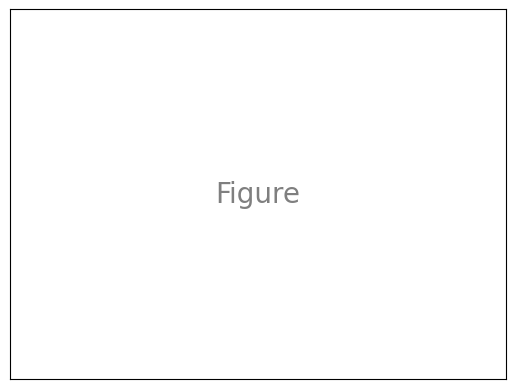

In [3]:
plt.figure()
plt.text( 0.5, 0.5, 'Figure', ha='center', 
          va='center', size=20, alpha=.5 )
plt.xticks([]), plt.yticks([])
plt.show()

用 plt.text() 函数，其参数解释如下：

* 第一、二个参数是指横轴和纵轴坐标

* 第三个参数字符是指要显示的内容

* ha, va 是横向和纵向位置

* size 设置字体大小

* alpha 设置字体透明度 (0.5 是半透明)

在图中可以添加基本元素「图片」。

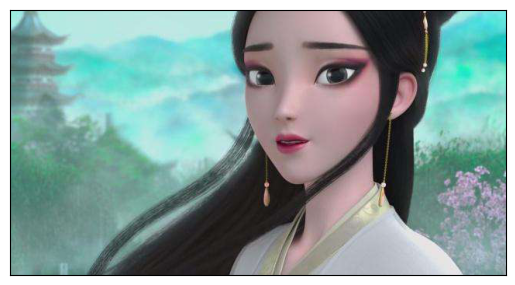

In [4]:
import numpy as np
plt.figure()
plt.xticks([]), plt.yticks([])
im = plt.imread('images/小白.jpg')
plt.imshow(im)
plt.show()

在图中可以添加基本元素「折线」。

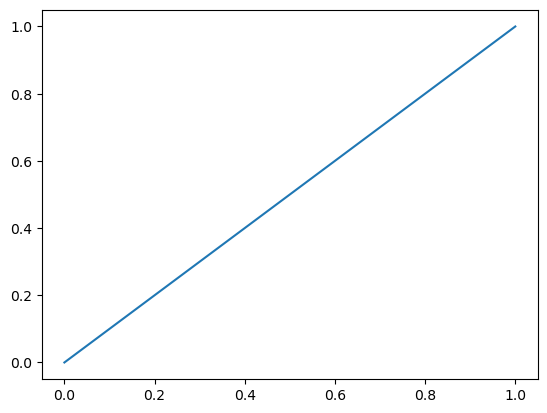

In [5]:
plt.figure()
plt.plot( [0,1],[0,1] )
plt.show()

plt.plot() 函数是用来画折线图的，前两个参数分别是 x 和 y，该函数会在第二节细讲。

当我们每次说画东西，看起来是在图 (Figure) 里面进行的，实际上是在坐标系 (Axes) 里面进行的。一幅图中可以有多个坐标系，因此在坐标系里画东西更方便 (有些设置使用起来也更灵活)。

下面来看看层级中排名第二的「坐标系」。

### 1.3 坐标系 & 子图

一幅图 (Figure) 中可以有多个坐标系 (Axes)，那不是说一幅图中有多幅子图 (Subplot)，因此坐标系和子图是不是同样的概念？

在绝大多数情况下是的，两者有一点细微差别：

* 子图在母图中的网格结构一定是规则的

* 坐标系在母图中的网格结构可以是不规则的

由此可见，子图是坐标系的一个特例，来我们先研究特例。

#### 子图

把图想成矩阵，那么子图就是矩阵中的元素，因此可像定义矩阵那样定义子图 - (行数、列数、第几个子图)。

    subplot(rows, columns, i-th plots)

文字解释起来有些晦涩，看代码和图就好懂了。

<font color="red"><b>1×2 子图</b></font>

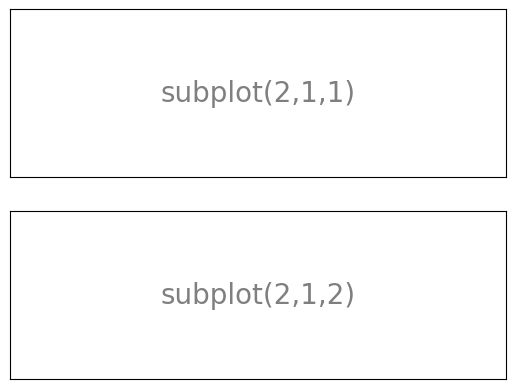

In [6]:
plt.subplot(2,1,1)
plt.xticks([]),plt.yticks([])
plt.text(0.5, 0.5, 'subplot(2,1,1)', ha='center', va='center', size=20, alpha=.5 )

plt.subplot(2,1,2)
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'subplot(2,1,2)', ha='center', va='center', size=20, alpha=.5 )

plt.show()

这两个子图类似于一个列向量

* subplot(2,1,1) 是第一幅

* subplot(2,1,2) 是第二幅

**声明完子图后，下面所有代码就只在这幅子图上生效，直到声明下一幅子图。**

<font color="red"><b>2×1 子图</b></font>

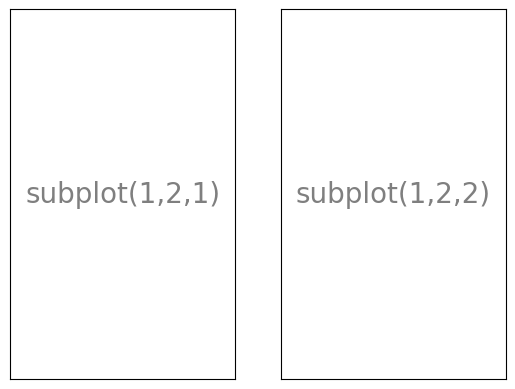

In [7]:
plt.subplot(1,2,1)
plt.xticks([]),plt.yticks([])
plt.text(0.5, 0.5, 'subplot(1,2,1)', ha='center', va='center', size=20, alpha=.5 )

plt.subplot(1,2,2)
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, 'subplot(1,2,2)', ha='center', va='center', size=20, alpha=.5 )

plt.show()

这两个子图类似于一个行向量

* subplot(1,2,1) 是第一幅

* subplot(1,2,2) 是第二幅

Matplotlib有两种画图接口：

* 一种是**Pyplot编程接口**（state-based），类似MATLAB风格，**使用更加简洁**。如上面的例子。

* 一种是**面向对象编程接口**（object-based），**功能更加强大**。如下面的例子

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法**plt.subplots**，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组。这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。


<font color="red"><b>2×2 子图</b></font>

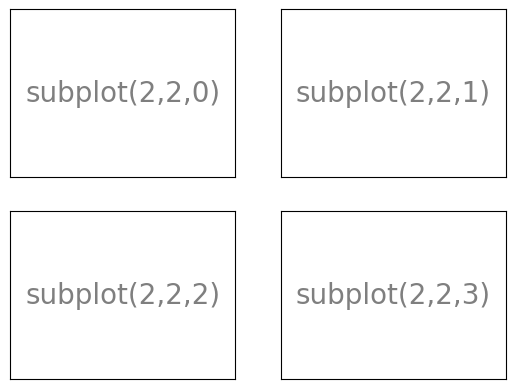

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# 可以轻松地对axes数组进行索引，就好像是一个二维数组一样
# axes[0,0].set( xticks=[], yticks=[] )
# s = 'My subplot'
# axes[0,0].text( 0.5, 0.3, s, ha='center', va='center', size=20, alpha=.5 )

for i,ax in enumerate(axes.flat):    #也可以axes.flatten()打平. flat将数组转换为1-D的迭代器,可以用for访问数组每一个元素;而flatten将数组的副本转换为一维(1-D)，并返回
    ax.set( xticks=[], yticks=[] )
    s = 'subplot(2,2,' + str(i) + ')'
    ax.text( 0.5, 0.5, s, ha='center', va='center', size=20, alpha=.5 )

plt.show()

这次我们用过坐标系来生成子图 (子图是坐标系的特例嘛)，第 1 行

    fig, axes = plt.subplots(nrows=2, ncols=2)

得到的 axes 是一个 2×2 的对象。在第 8行的 for 循环中用 axes.flat 将其打平，然后在每个 ax 上生成子图。

#### 坐标系

坐标系比子图更通用，有两种生成方式

* 用 gridspec 包加上 subplot() 

* 用 plt.axes()

<font color="red"><b>不规则网格</b></font>

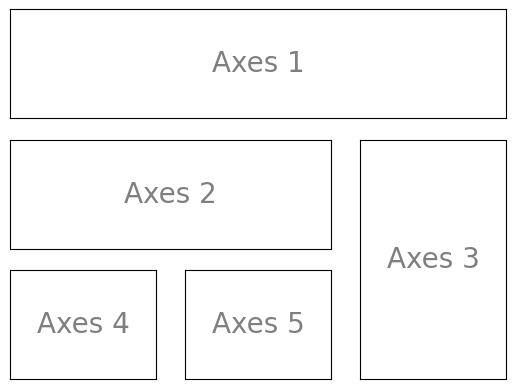

In [9]:
import matplotlib.gridspec as gridspec
G = gridspec.GridSpec(3,3)

ax1 = plt.subplot(G[0,:])
plt.xticks([]),plt.yticks([])
plt.text( 0.5, 0.5, 'Axes 1', ha='center', va='center', size=20, alpha=.5 )

ax2 = plt.subplot(G[1,:-1])
plt.xticks([]),plt.yticks([])
plt.text( 0.5, 0.5, 'Axes 2', ha='center', va='center', size=20, alpha=.5 )

ax3 = plt.subplot(G[1:,-1])
plt.xticks([]),plt.yticks([])
plt.text( 0.5, 0.5, 'Axes 3', ha='center', va='center', size=20, alpha=.5 )

ax4 = plt.subplot(G[-1,0])
plt.xticks([]),plt.yticks([])
plt.text( 0.5, 0.5, 'Axes 4', ha='center', va='center', size=20, alpha=.5 )

ax5 = plt.subplot(G[-1,-2])
plt.xticks([]),plt.yticks([])
plt.text( 0.5, 0.5, 'Axes 5', ha='center', va='center', size=20, alpha=.5 )

plt.show()

第 2 行将整幅图分成 3×3 份赋值给 G，第 4, 8, 12, 16, 20 行分别用

    plt.subplot(G[]) 

生成五个坐标系。G[] 里面的切片和 Numpy 数组用法一样：

* G[0, :] = 图的第一行 (Axes 1)

* G[1, :-1] = 图的第二行，第二三列 (Axes 2)

* G[1:, -1] = 图的第二三行，第三列 (Axes 3)

* G[-1, 0] = 图的第三行，第一列 (Axes 4)

* G[-1, -2] = 图的第三行，第二列 (Axes 5)

超级细心的读者可能会发现，上面所有的图都看不到坐标轴和刻度啊，是的，我是故意这样做的，在深度研究坐标系和子图时，剔除不必要的信息，用的是以下代码 (将刻度设为空集 [])：

>plt.xticks([]), plt.yticks([])

或

>ax.set( xticks=[], yticks=[] )   

现在是时候来看看层级中排名第三的「坐标轴」。

### 1.4 坐标轴

一个坐标系 (Axes)，通常是二维，有两条坐标轴 (Axis)：

* 横轴：XAxis

* 纵轴：YAxis

每个坐标轴都包含两个元素

* 容器类元素「刻度」，该对象里还包含**刻度本身**和**刻度标签**

* 基础类元素「标签」，该对象包含的是**坐标轴标签**

下面来看看层级中排名第四也是最后的「刻度」。

### 1.5 刻度

刻度 (Tick) 其实在坐标轴那节已经讲过了，它核心内容就是

* 一条短线 (刻度本身)

* 一串字符 (刻度标签)

### 1.6 基础元素

目前，我们已经介绍四个最重要的容器以及它们之间的层级

>Figure → Axes → Axis → Ticks

>图 → 坐标系 → 坐标轴 → 刻度

但要画出一幅有内容的图，还需要在容器里添加基础元素比如线 (line), 点 (marker), 文字 (text), 图例 (legend), 网格 (grid), 标题 (title), 图片 (image) 等，具体来说

* 画一条线，用 plt.plot() 或 ax.plot()

* 画个记号，用 plt.scatter() 或 ax.scatter()

* 添加文字，用 plt.text() 或 ax.text()

* 添加图例，用 plt.legend() 或 ax.legend()

* 添加图片，用 plt.imshow() 或 ax.imshow()

最后用 Matplotlib 官网的图来总结所有元素。

![](images/8-5.png)

现在你基本理解了 Matplotlib 里面的绘图逻辑和元素，下两节分别从不同维度 (深度和广度) 研究如何画图：

* 第二节只研究一种类型的图「折线图」，但从头到尾不断根据需求添加元素完善它。深度研究做到完美！

* 第三节研究四种类型的图 (展示数据的分布、联系、对比和组成)，却没在美感上下功夫，广度研究满足目的！

但读完后两节后，你应该可以在各种类型的图上做到完美。

## 2 画美感图

本节记录着老板让斯蒂文绘图不断提需求直到把他逼疯的一段对话。

![](images/8-6.png)

### 2.1 画第一幅图

![](images/8-7.png)

首先用 pd.read_csv 函数从存好的 S&P500.csv，截屏如下：

![](images/8-8.png)

该函数中三个参数代表：

* index_col = 0 是说把第一列 Date 当成行标签 (index)

* parse_dates = True 是说把行标签转成 date 对象

* dayFirst = True 是说日期是 DD/MM/YYYY 这样的格式

In [10]:
import pandas as pd

data = pd.read_csv( 'data/S&P500.csv', 
                    index_col=0, 
                    parse_dates=True,
                    dayfirst=True )
data.head(3).append(data.tail(3))

AttributeError: 'DataFrame' object has no attribute 'append'

S&P 500 的数据从 1950 年 1 月 3 号开始，老板只需要 2007 年 1 月 1 日到 2010 年 1 月 1 日的数据。做个切片即可，存储成 spx。

In [ ]:
spx = data[['Adj Close']].loc['2007-01-01':'2010-01-01']
spx.head(3).append(spx.tail(3))

spx 是个 DataFrame，将它的值一个个画出折线图只需用 plt.plot() 函数，展示在屏幕需用 plt.show()。

In [ ]:
plt.plot( spx.values )
plt.show()

在 plot() 函数里面只有变量 y 时 (y = spx.values)，那么自变量就是默认赋值为 range(len(y))。

此外我们没有设置图的尺寸，像素、线的颜色宽度、坐标轴的刻度和标签、图例、标题等等，所有设置都用的是 matplotlib 的默认设置。

此图虽丑，但也满足了老板的需求，即标准普尔 500 指数在 2007-2010 的走势图。斯蒂文提交给了老板。

**<font color='red'>知识点：折线图</font>**

折线图 (line chart) 显示随时间而变化的连续数据，因此非常适用于显示在相等时间间隔下数据的趋势。在 Matplotlib 里的语法是

* plt.plot()

* ax.plot()

**plot函数的参数解读**

matplotlib模块中plot函数语法及参数含义：

```python
plt.plot(x,y,linestyle,linewidth,color,marker,
        markersize,markeredgecolor,markerfactcolor,label,alpha)
```

*  **x**：指定折线图的x轴数据；

*  **y**：指定折线图的y轴数据；x,y的值也可传一个dataframe，会自动分配其索引到x轴，分配其列到y轴；

*  **linestyle**：指定折线的类型，可以是实线、虚线、点虚线、点点线等，默认为实线；

*  **linewidth**：指定折线的宽度

*  **marker**：可以为折线图添加点，该参数是设置点的形状；

*  **markersize**：设置点的大小；

*  **markeredgecolor**：设置点的边框色；

*  **markerfactcolor**：设置点的填充色；

*  **label**：为折线图添加标签，类似于图例的作用；



### 2.2 图的默认设置

![](images/8-9.png)

### 2.3 设置尺寸和 DPI

![](images/8-11.png)

用 figsize 和 dpi 一起可以控制图的大小和像素。

函数 figsize(w,h) 决定图的宽和高 (单位是英寸)，而属性 dpi 全称 dots per inches，测量每英寸多少像素。两个属性一起用，那么得到的图的像素为

>(w*dpi, h*dpi)

套用在下面代码中，我们其实将图的大小设置成 16×6 平方英寸，而像素设置成 (1600, 600)，因为 dpi = 100。

In [ ]:
plt.figure( figsize=(16,6), dpi=100 )
plt.plot( spx.values )   # 试试把 spx.values 换成 spx，看有什么不同？
plt.show()

运行代码生成大宽屏图！

### 2.4 设置颜色-风格-宽度

![](images/8-12.png)

在 plt.plot() 用 color，linewidth  和 linestyle 属性一起可以控制折线的颜色 (上面定义的深青色)、宽度 (2 像素) 和风格 (连续线)。

In [ ]:
plt.figure( figsize=(16,6), dpi=100 )
plt.plot( spx.values,       
          color=dt_hex,     # 线条颜色
          linewidth=2,      # 线条粗细
          linestyle='-' )   # 线条风格 
plt.show()

现在线条更明显了，而深青色看起来也比较有品位。

### 2.5 设置边界

![](images/8-13.png)

可以用

* plt.plot() 或 ax.plot() 来画折线

* plt.xlim(), plt.ylim() 或 ax.set_xlim(), ax_set_ylim() 来设置横轴和纵轴的边界

In [ ]:
plt.figure( figsize=(16,6), dpi=100 )
x = spx.index
y = spx.values
plt.plot( x,
          y,                # x,y 可以用 spx代替
          color=dt_hex,     # 线条颜色
          linewidth=2,      # 线条粗细
          linestyle='-' )   # 线条风格 
plt.xlim(pd.to_datetime(['1/1/2007', '1/1/2010']))
plt.ylim(y.min()*0.8, y.max()*1.2 )
plt.show()

第 3 行的 x 是日期 (回顾 spx 是一个 DataFrame，行标签是日期)。

第 9 行将横轴的上下边界设为 2007-01-01 和 2010-01-01，只好是整个时间序列的起始日和终止日。

第 10 行将纵轴的上下边界设为 spx 的最小值的 0.8 倍和最大值的 1.2 倍。

现在横轴的刻度标签都是日期，比数字刻度带来的信息多；而 spx 图离顶部也有空间，看起来没那么挤。

### 2.6 设置刻度和标签

![](images/8-14.png)

上图横轴的刻度个数 (老板说日期隔得有点开) 和标签显示 (老板说只有年月) 都是默认设置。为了满足老板的要求，斯蒂文只能手动设置，用 xticks 函数：

* 先用第一个参数 `range(0,len(x),40)` 设置出数值刻度

* 再用第二个参数 `[x[i].strftime('%Y-%m-%d') for i in range(0,len(x),40)]` 在对应的数值刻度上写标签

In [ ]:
plt.figure( figsize=(16,6), dpi=100 )
x = spx.index
y = spx.values
plt.plot( y,
          color=dt_hex,     # 线条颜色
          linewidth=2,      # 线条粗细
          linestyle='-' )   # 线条风格 
plt.xlim(-1, len(x)+1)
plt.ylim(y.min()*0.8, y.max()*1.2 )
plt.xticks( range(0,len(x),40),[x[i].strftime('%Y-%m-%d') for i in range(0,len(x),40)], rotation=90 )
plt.show()

第 8 行设置横轴的边界，下界是 - 1，上界是 len(x) +1。

第 10 行先设置横轴「数值刻度」为 range(0,len(x), 40)，即 0, 40, 80, ....

再在这些「数值刻度」上写标签，即格式为 %Y-%m-%d 的日期。由于日期个数比较多，而且日期字符比较长，直接在图中显示出来会相互重叠非常难看。这里调节参数 rotation = 90 使得日期逆时针转了 90 度，看上图效果好多了。

现在横轴的刻度标签是带「年-月-日」的日期，而且标签的间隔刚刚好。

### 2.7 添加图例

![](images/8-15.png)

添加图例 (legend) 非常简单，只需要在 plt.plot() 里多设定一个参数 label，然后用

>plt.legend()

其中 loc = 0 表示 matplotlib 自动安排一个最好位置显示图例，而 frameon = True 给图例加了外框。

In [ ]:
plt.figure( figsize=(16,6), dpi=100 )
x = spx.index
y = spx.values
plt.plot( y,
          color=dt_hex,     # 线条颜色
          linewidth=2,      # 线条粗细
          linestyle='-',    # 线条风格
          label='S&P500')   # 图例标签 
plt.legend( loc=0, frameon=True )

plt.xlim(-1, len(x)+1)
plt.ylim(y.min()*0.8, y.max()*1.2 )
plt.xticks( range(0,len(x),40),[x[i].strftime('%Y-%m-%d') for i in range(0,len(x),40)], rotation=90 )
plt.show()

注意图的右上角多了图例 **S&P500**。

### 2.8 添加第二幅图

![](images/8-16.png)

在改进代码之前，先介绍一下 VIX 指数。

<br /><font color="red"><b>知识点</b></font>

VIX 指数是芝加哥期权交易所 (CBOE) 市场波动率指数的交易代号，常见于衡量 S&P500 指数期权的隐含波动性，通常被称为「恐慌指数」，它是了解市场对未来30天市场波动性预期的一种衡量方法。

由其定义可知，S&P500 指数涨时，VIX 跌，而 S&P500 指数暴跌时，VIX 暴涨。

和之前一样，首先用 pd.read_csv 函数从存好的 VIX.csv 读取数据存成 DataFrame。

In [ ]:
data = pd.read_csv( 'data/VIX.csv', index_col=0, 
                               parse_dates=True,
                               dayfirst=True )
vix = data[['Adj Close']].loc['2007-01-01':'2010-01-01']
vix.head(3).append(vix.tail(3))

添加第二幅图也很简单，用两次 plt.plot() 或者 ax.plot() 即可。在本例中两者可以随意使用，但两者在使用「.methods」时有个小细节不知道大家注意到没有，

* plt.xlim

* plt.ylim

* plt.xticks


* ax.set_xlim

* ax.set_ylim

* ax.set_xticks

* ax.set_xticklabels

**用 plt 实现**

In [ ]:
fig = plt.figure( figsize=(16,6), dpi=100)
x = spx.index
y1 = spx.values
y2 = vix.values
plt.plot( y1, color=dt_hex, linewidth=2, linestyle='-',label='S&P500' )
plt.plot( y2, color=r_hex, linewidth=2, linestyle='-',label='VIX' )
plt.legend( loc=0, frameon=True )

plt.xlim(-1, len(x)+1)
plt.ylim( np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2 )

x_tick =  range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
plt.xticks( x_tick, x_label, rotation=90 )
plt.show()

**用 ax 实现**

In [ ]:
fig = plt.figure( figsize=(16,6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = spx.index
y1 = spx.values
y2 = vix.values
ax.plot( y1, color=dt_hex, linewidth=2, linestyle='-',label='S&P500' )
ax.plot( y2, color=r_hex, linewidth=2, linestyle='-',label='VIX' )
ax.legend( loc=0, frameon=True )

ax.set_xlim(-1, len(x)+1)
ax.set_ylim( np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2 )

x_tick =  range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax.set_xticks( x_tick )
ax.set_xticklabels( x_label, rotation=90 );

这图怎么成这样？？？VIX 怎么是一条平线？

### 2.9 两个坐标系 & 两幅子图

![](images/8-17.png)

S&P500 的量纲都是千位数，而 VIX 的量刚是两位数，两者放在一起，那可不是 VIX 就像一条水平线一样。两种改进方式：

1. 用两个坐标系 (two axes)

2. 用两幅子图 (two subplots)

<font color="red"><b>两个坐标系</b></font>

In [ ]:
fig = plt.figure( figsize=(16,6), dpi=100)
ax1 = fig.add_subplot(1,1,1)

x = spx.index
y1 = spx.values
y2 = vix.values

ax1.plot( y1, color=dt_hex, linewidth=2, linestyle='-',label='S&P500' )
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim( np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2 )

x_tick =  range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks( x_tick )
ax1.set_xticklabels( x_label, rotation=90 )
ax1.legend( loc='upper left', frameon=True )

#Add a second axes
ax2 = ax1.twinx()
ax2.plot( y2, color=r_hex, linewidth=2, linestyle='-',label='VIX' )
ax2.legend( loc='upper right', frameon=True );

用 ax1 和 ax2 就能实现在两个坐标系上画图，代码核心部分是第 19 行的

>ax2 = ax1.twinx()

在每个坐标系下画图以及各种设置前面都讲的很清楚了。

> Mc：股市那两条曲线的legend分开放在两侧，怎么看怎么别扭，还是放在一块显示比较好。

> 可使用一个轴的legend()函数实现

In [ ]:
fig = plt.figure( figsize=(16,6), dpi=100)
ax1 = fig.add_subplot(1,1,1)

x = spx.index
y1 = spx.values
y2 = vix.values

lns1 = ax1.plot( y1, color=dt_hex, linewidth=2, linestyle='-',label='S&P500' )
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim( np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2 )

x_tick =  range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
ax1.set_xticks( x_tick )
ax1.set_xticklabels( x_label, rotation=90 )
# ax1.legend( loc='upper left', frameon=True )

#Add a second axes
ax2 = ax1.twinx()
lns2 = ax2.plot( y2, color=r_hex, linewidth=2, linestyle='-',label='VIX' )
# ax2.legend( loc='upper right', frameon=True );

# 仅使用一个轴的legend()函数
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

<br /><font color="red"><b>两幅子图</b></font>

In [ ]:
plt.figure( figsize=(16,12), dpi=100)

# subplot 1
plt.subplot(2,1,1)
x = spx.index
y1 = spx.values

plt.plot( y1, color=dt_hex, linewidth=2, linestyle='-',label='S&P500' )
plt.xlim(-1, len(x)+1)
plt.ylim( y1.min()*0.8, y1.max()*1.2 )

x_tick =  range(0,len(x),40)
x_label = [x[i].strftime('%Y-%m-%d') for i in x_tick]
plt.xticks( x_tick, x_label, rotation=45 )
plt.legend( loc='upper left', frameon=True )

# subplot 2
plt.subplot(2,1,2)
y2 = vix.values

plt.plot( y2, color=r_hex, linewidth=2, linestyle='-',label='VIX' )
plt.xlim(-1, len(x)+1)
plt.ylim( y2.min()*0.8, y2.max()*1.2 )

plt.xticks( x_tick, x_label, rotation=45 )
plt.legend( loc='upper left', frameon=True )

plt.show()

定义 subplot(2,1,1) 和 subplot(2,1,2) 就能实现再两幅子图上画图。

在每幅子图上画图以及各种设置前面都讲的很清楚了。

这两种方法都可用，但在本例中，S&P500 和 VIX 放在一起 (用两个坐标系) 更能看出它们之间的关系，比如 2008 年 9 月到 2009 年 3 月的金融危机期间，S&P 500 在狂泻和 VIX 在飙升 。

## 3 画有效图

### 3.1 概览

在做图表设计时,经常会面临如何选用合适的图表的问题，图表展示的关系分为五大类(**可看大图**)：

**1. 比较 (comparison)**

<font color="red"><b>比较</b></font>可以展示事物的排列顺序，表达“大于”、“小于”或者“大致相当”等比较相对关系中的信息，可首选<font color="red"><b>条形图/柱形图</b></font>；

**2. 趋势 (trend)**
    
<font color="red"><b>趋势</b></font>是最常见的一种时间序列关系，关心数据如何随着时间的变化而变化，可选用<font color="red"><b>折线图</b></font>可更好地表现指标随时间呈现的趋势；
    
**3. 分布 (distribution)**
    
<font color="red"><b>分布</b></font>是关心各数值范围内各包含了多少项目，表达“集中”、“频率”与“分布”等信息，可选用<font color="red"><b>直方图</b></font>；

**4. 联系 (relationship)**
    
<font color="red"><b>联系</b></font>主要关注两个变量之间是否存在模式关系，用于表达“与……有关”、“随……而增长”、“随……而不同”等变量间的关系，可选用<font color="red"><b>散点图</b></font>来展示。

**5. 构成 (composition)**

<font color="red"><b>构成</b></font>主要关注每个部分在整体中所占的百分比，表达“份额”、“百分比”等信息，可选用<font color="red"><b>饼状图</b></font>；

![](images/Mc-chart-choose.jpg)



**整体配置**

In [ ]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 正常显示中文的设置
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# R 中的 ggplot 的效果
# plt.style.use('ggplot')

### 3.2 条形图/柱形图

plt.bar()：正常柱状图，常见的统计图；

plt.barh()：横向的柱状图，可以理解为正常柱状图旋转了90°。

**plt.bar 常用参数解释：**

```python
plt.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs,)
```

* **x**：表示x坐标，数据类型为int或float类型，刻度自适应调整；也可传dataframe的object，x轴上等间距排列；

* **height**：表示柱状图的高度，也就是y坐标值，数据类型为int或float类型；

* **width**：表示柱状图的宽度，取值在0~1之间，默认为0.8；

* **bottom**：柱状图的起始位置，也就是y轴的起始坐标；

* **align**：柱状图的中心位置，默认"center"居中，可设置为"lege"边缘；

* **color**：柱状图颜色；

* **edgecolor**：边框颜色；

* **linewidth**：边框宽度；

* **tick_label**：下标标签；

* **log**：柱状图y周使用科学计算方法，bool类型；

* **orientation**：柱状图是竖直还是水平，竖直


**plt.barh 常用参数解释：**

```python
plt.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
```

* **y**：表示y坐标，数据类型为int或float类型，刻度自适应调整；也可传dataframe的object，y轴上等间距排列；

* **width**：表示柱状图的长度，也就是x坐标值，数据类型为int或float类型；

* **height**：表示柱状图的高度，取值在0~1之间，默认为0.8；

* 其他参数与plt.bar()类似。

In [ ]:
# 构建数据
Y2016 = [15600,12700,11300,4270,3620]
Y2017 = [17400,14800,12000,5200,4020]
labels = ['北京','上海','香港','深圳','广州']
bar_width = 0.45

# 设置图形大小
plt.figure(figsize=(12,8))

# 绘图
plt.bar(np.arange(5), Y2016, label = '2016年度', color = 'steelblue', alpha = 0.8, width = bar_width)
plt.bar(np.arange(5)+bar_width, Y2017, label = '2017年度', color = 'indianred', alpha = 0.8, width = bar_width)

# 添加轴标签
plt.xlabel('Top5城市')
plt.ylabel('家庭数量')

# 添加标题
plt.title('亿万财富家庭数Top5城市分布')

# 添加刻度标签
plt.xticks(np.arange(5)+bar_width,labels)

# 设置Y轴的刻度范围
plt.ylim([2500, 19000])

# 为每个条形图添加数值标签
for x2016,y2016 in enumerate(Y2016):
    plt.text(x2016, y2016+100, '%s' %y2016, horizontalalignment='center')   # verticalalignment='bottom', fontdict={'fontweight':500, 'size':12}

for x2017,y2017 in enumerate(Y2017):
    plt.text(x2017+bar_width, y2017+100, '%s' %y2017, horizontalalignment='center')
    
# 显示图例
plt.legend()

# 显示图形
plt.show()

**请思考并尝试**

> 1. 修改 bar 的参数，看看有没有变化，体会各个参数的意义。

> 2. 将上面改成横向的柱形图（提示：使用 **plt.barh** )

### 3.3 折线图

折线图 (line chart) 显示随时间而变化的连续数据，因此非常适用于显示在相等时间间隔下数据的趋势。在 Matplotlib 里的语法是

* plt.plot()

* ax.plot()

**plot函数的参数解读**

matplotlib模块中plot函数语法及参数含义：

```python
plt.plot(x,y,linestyle,linewidth,color,marker,
        markersize,markeredgecolor,markerfactcolor,label,alpha)
```

*  **x**：指定折线图的x轴数据；

*  **y**：指定折线图的y轴数据；

*  **linestyle**：指定折线的类型，可以是实线、虚线、点虚线、点点线等，默认为实线；

*  **linewidth**：指定折线的宽度

*  **marker**：可以为折线图添加点，该参数是设置点的形状；

*  **markersize**：设置点的大小；

*  **markeredgecolor**：设置点的边框色；

*  **markerfactcolor**：设置点的填充色；

*  **label**：为折线图添加标签，类似于图例的作用；

In [ ]:
# 设置图框的大小
fig = plt.figure(figsize=(10,6))

# 生成数据
x = np.linspace(-10, 10, 50) 
 
# 绘图-- sin(x)
plt.plot(x, # x轴数据
         np.sin(x), # y轴数据
         linestyle = ':', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue', # 点的填充色
         label = 'sin(x)') # 添加标签
 
# 绘图-- cos(x)
plt.plot(x, # x轴数据
         np.cos(x), # y轴数据
         linestyle = '-.', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#ff9999', # 折线颜色
         marker = '^', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#ff9999', # 点的填充色
         label = 'cos(x)') # 添加标签
 
# 添加标题和坐标轴标签
plt.title('sin(x) vs cos(x)', fontdict={'fontweight':500, 'size':16})
plt.xlabel('X轴', fontdict={'fontweight':500, 'size':14})
plt.ylabel('Y轴', fontdict={'fontweight':500, 'size':14})
 
# 剔除图框上边界和右边界的刻度
# plt.tick_params(top = 'off', right = 'off')
 
# 显示图例
plt.legend()
# 显示图形
plt.show()

### 3.4 直方图

直方图 (histogram chart)，又称质量分布图，是一种统计报告图，由一系列高度不等的纵向条纹或线段表示数据分布的情况。 一般用横轴表示数据类型，纵轴表示分布情况。在 Matplotlib 里的语法是

* plt.hist()

* ax.hist()

**hist函数的参数解读**

```python
plt.hist(x, bins=10, range=None, density=False, weights=None, cumulative=False, bottom=None, 
        histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False,
        color=None, label=None, stacked=False)
```

*  **x**：指定要绘制直方图的数据；

*  **bins**：指定直方图条形的个数；

*  **range**：指定直方图数据的上下界，默认包含绘图数据的最大值和最小值；

*  **density**：是否将直方图的频数转换成频率；

*  **weights**：该参数可为每一个数据点设置权重；

*  **cumulative**：是否需要计算累计频数或频率；

*  **bottom**：可以为直方图的每个条形添加基准线，默认为0；

*  **histtype**：指定直方图的类型，默认为bar，除此还有’barstacked’, ‘step’, ?‘stepfilled’；

*  **align**：设置条形边界值的对其方式，默认为mid，除此还有’left’和’right’；

*  **orientation**：设置直方图的摆放方向，默认为垂直方向；

*  **rwidth**：设置直方图条形宽度的百分比；

*  **log**：是否需要对绘图数据进行log变换；

*  **color**：设置直方图的填充色；

*  **label**：设置直方图的标签，可通过legend展示其图例；

*  **stacked**：当有多个数据时，是否需要将直方图呈堆叠摆放，默认水平摆放；

**分析 Titanic 整体乘客的年龄直方图**

In [ ]:
# 读取Titanic数据集
titanic = pd.read_csv('data/titanic.csv')

# 检查年龄是否有缺失any(titanic.Age.isnull())
# 不妨删除含有缺失年龄的观察
titanic.dropna(subset=['Age'], inplace=True)
 
# 设置图形的显示风格
# plt.style.use('ggplot')

# 设置图框的大小
fig = plt.figure(figsize=(10,6))

# 绘图：乘客年龄的频数直方图
plt.hist(titanic.Age, # 绘图数据
         bins = 20, # 指定直方图的条形数为20个
         color = 'steelblue', # 指定填充色
         edgecolor = 'k', # 指定直方图的边界色
         label = '直方图' )# 为直方图呈现标签
 
# 去除图形顶部边界和右边界的刻度
# plt.tick_params(top='off', right='off')

# 显示图例
plt.legend()
# 显示图形
plt.show()

上图绘制的是年龄的频数直方图，从整体的分布来看，有点像正态分布，两边低中间高的倒钟形状。除此，我们还可以绘制累计频率直方图，并且设置5岁为组距，如下代码可以表示成：

In [ ]:
# 设置图框的大小
fig = plt.figure(figsize=(10,6))

# 绘图：乘客年龄的累计频率直方图
plt.hist(titanic.Age, # 绘图数据
        bins = np.arange(titanic.Age.min(),titanic.Age.max(),5), # 指定直方图的组距
        density = True, # 设置为频率直方图
        cumulative = True, # 积累直方图
        color = 'steelblue', # 指定填充色
        edgecolor = 'k', # 指定直方图的边界色
        label = '直方图' )# 为直方图呈现标签
 
# 设置坐标轴标签和标题
plt.title('乘客年龄的频率累计直方图')
plt.xlabel('年龄')
plt.ylabel('累计频率')
 
# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')
 
# 显示图例
plt.legend(loc = 'best')
# 显示图形
plt.show()

通过累计频率直方图就可以快速的发现什么年龄段的人数占了多少比重，例如35岁以下的乘客占了7成。

**二元直方图的绘制**

上面绘制的直方图都是基于所有乘客的年龄，如果想对比男女乘客的年龄直方图的话，我们可以通过两个hist将不同性别的直方图绘制到一张图内，具体代码如下：

In [ ]:
# 设置图框的大小
fig = plt.figure(figsize=(12,6))

# 提取不同性别的年龄数据
age_female = titanic.Age[titanic.Sex == 'female']
age_male = titanic.Age[titanic.Sex == 'male']
 
# 设置直方图的组距
bins = np.arange(titanic.Age.min(), titanic.Age.max(), 2)
# 男性乘客年龄直方图
plt.hist(age_male, bins = bins, label = '男性', color = 'deepskyblue', edgecolor = 'w',alpha = 0.7)
# 女性乘客年龄直方图
plt.hist(age_female, bins = bins, label = '女性', color = 'tomato',edgecolor = 'w', alpha = 0.6)
 
# 设置坐标轴标签和标题
plt.title('乘客年龄直方图')
plt.xlabel('年龄')
plt.ylabel('人数')
 
# 去除图形顶部边界和右边界的刻度
# plt.tick_params(top='off', right='off')
 
# 显示图例
plt.legend()
# 显示图形
plt.show()

### 3.5 散点图

散点图 (scatter chart) 是用于研究两个变量之间关系的经典的和基本的图表。 用两组数据构成多个坐标点，考察坐标点的分布，判断两变量之间是否存在某种联系的分布模式。如果数据中有多个组，则可能需要以不同颜色可视化每个组。在 Matplotlib 里的语法是

* plt.scatter()

* ax.scatter()

**scatter函数的参数解读**

```python
plt.scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, 
            alpha=None, linewidths=None, edgecolors=None)
```

*  **x**：指定散点图的x轴数据；

*  **y**：指定散点图的y轴数据；

*  **s**：指定散点图点的大小，默认为20，通过传入新的变量，实现气泡图的绘制；

*  **c**：指定散点图点的颜色，默认为蓝色；

*  **marker**：指定散点图点的形状，默认为圆形；

*  **cmap**：指定色图，只有当c参数是一个浮点型的数组的时候才起作用；

*  **norm**：设置数据亮度，标准化到0~1之间，使用该参数仍需要c为浮点型的数组；

*  **vmin、vmax**：亮度设置，与norm类似，如果使用了norm则该参数无效；

*  **alpha**：设置散点的透明度；

*  **linewidths**：设置散点边界线的宽度；

*  **edgecolors**：设置散点边界线的颜色；

In [ ]:
# 设置图形大小
plt.figure(figsize=(10, 6), dpi= 80)

# 绘制散点图
plt.scatter(titanic.Age,  # x轴数据
            titanic.Fare, # y轴数据
            s = 200,      # 设置点的大小 
            c = 'coral',   # 设置点的颜色
            marker = 'o',    # 设置点的形状
            alpha = .7,      # 设置点的透明度
            linewidths = .5, # 设置散点边界的粗细
            edgecolors = 'peachpuff' # 设置散点边界的颜色
            )

# 添加轴标签和标题
plt.title('年龄与票价之间的关系')
plt.xlabel('乘客年龄')
plt.ylabel('船票票价')

# 显示图形
plt.show()

### 散点图 + 边缘直方图 （Marginal Histogram）

边缘直方图具有沿 X 和 Y 轴变量的直方图。 这用于可视化 X 和 Y 之间的关系以及单独的 X 和 Y 的单变量分布。 这种图经常用于探索性数据分析（EDA）。

In [ ]:
# 创建图和网格
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# 定义坐标轴
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# 绘制主坐标轴上的散点图
ax_main.scatter(titanic.Age, titanic.Fare, s=100, alpha=.7, linewidths=.5)

# 绘制底部坐标轴上的直方图
ax_bottom.hist(titanic.Age, 80, histtype='stepfilled', orientation='vertical', color='peru')
ax_bottom.invert_yaxis()   # 翻转y坐标轴

# 绘制右侧坐标轴上的直方图
ax_right.hist(titanic.Fare, 50, histtype='stepfilled', orientation='horizontal', color='yellowgreen')

# 设置标题
ax_main.set(title='泰坦尼克号船票分析 \n 年龄 vs 票价', xlabel='乘客年龄', ylabel='船票票价')
ax_main.title.set_fontsize(18)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

# 设置坐标轴标签
xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)

# 显示图形
plt.show()

### 3.6 饼状图

饼状图 (pie chart) 是一个划分为几个扇形的圆形统计图表，用于描述量、频率或百分比之间的相对关系。 在饼状图中，每个扇区面积大小为其所表示的数量的比例。在 Matplotlib 里的语法是

* plt.pie()

* ax.pie()

#### pie函数参数解读

```python
plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, 
        labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, 
        textprops=None, center=(0, 0), frame=False)
```

*  **x**：指定绘图的数据；

*  **explode**：指定饼图某些部分的突出显示，即呈现爆炸式；

*  **labels**：为饼图添加标签说明，类似于图例说明；

*  **colors**：指定饼图的填充色；

*  **autopct**：自动添加百分比显示，可以采用格式化的方法显示；

*  **pctdistance**：设置百分比标签与圆心的距离；

*  **shadow**：是否添加饼图的阴影效果；

*  **labeldistance**：设置各扇形标签（图例）与圆心的距离；

*  **startangle**：设置饼图的初始摆放角度；

*  **radius**：设置饼图的半径大小；

*  **counterclock**：是否让饼图按逆时针顺序呈现；

*  **wedgeprops**：设置饼图内外边界的属性，如边界线的粗细、颜色等；

*  **textprops**：设置饼图中文本的属性，如字体大小、颜色等；

*  **center**：指定饼图的中心点位置，默认为原点

*  **frame**：是否要显示饼图背后的图框，如果设置为True的话，需要同时控制图框x轴、y轴的范围和饼图的中心位置； 

#### 案例：芝麻信用失信用户分析

关于绘图数据，我们借用芝麻信用近300万失信人群的样本统计数据，该数据显示，从受教育水平上来看，中专占比25.15%，大专占比37.24%，本科占比33.36%，硕士占比3.68%，剩余的其他学历占比0.57%。对于这样一组数据，我们该如何使用饼图来呈现呢？

In [ ]:
# 设置图形大小
plt.figure(figsize = (10,8))
 
# 构造数据
edu = [0.2515,0.3724,0.3336,0.0368,0.0057]
labels = ['中专','大专','本科','硕士','其他']
 
explode = [0,0.1,0,0,0]  # 用于突出显示大专学历人群
colors=['steelblue','indianred','olivedrab','chocolate','hotpink'] # 自定义颜色
 
# 将横、纵坐标轴标准化处理，保证饼图是一个正圆，否则为椭圆
plt.axes(aspect='equal')
 
# 控制x轴和y轴的范围
plt.xlim(0,4)
plt.ylim(0,4)
 
# 绘制饼图
plt.pie(x = edu, # 绘图数据
        explode=explode, # 突出显示大专人群
        labels=labels, # 添加标签
        colors=colors, # 设置饼图的自定义填充色
        autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数
        startangle = 180, # 设置饼图的初始角度
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 0.6, # 设置标签与圆心的距离
#         shadow = True,    # 设置是否添加阴影效果
#         radius = 1.5, # 设置饼图的半径
#         counterclock = False, # 是否逆时针，这里设置为顺时针方向
#         wedgeprops = {'linewidth': 0.2, 'edgecolor':'white'},# 设置饼图内外边界的属性值 
#         center = (1.8,1.8), # 设置饼图的原点
#         frame = 1,# 是否显示饼图的图框，这里设置显示
        textprops = {'fontsize':12, 'color':'w'}) # 设置文本标签的属性值
 
# 删除x轴和y轴的刻度
plt.xticks(())
plt.yticks(())
# 添加图标题
plt.title('芝麻信用失信用户教育水平分布')
 
# 显示图例
plt.legend()
# 显示图形
plt.show()


### 3.7 综合运用

在一个坐标系(子图)中可以混用多种图形。比如我们可以用柱形图和折线图混用来展示 Titanic 数据集中亲人数和生存率之间的关系。

**绘制柱线混合图**

In [ ]:
# 读取Titanic数据集
titanic = pd.read_csv('data/titanic.csv')

# 构建数据
parch = titanic[['Parch','Survived']].groupby(['Parch']).mean().reset_index()
sibsp = titanic[['SibSp','Survived']].groupby(['SibSp']).mean().reset_index()
titanic['Family_Size'] = titanic['Parch'] + titanic['SibSp']   # 亲人总数 = 父母子女数 + 堂兄弟姊妹数
family = titanic[['Family_Size','Survived']].groupby(['Family_Size']).mean().reset_index()
bar_width = 0.4

# 设置图形大小
plt.figure(figsize=(16,8))

# 绘柱形图
plt.bar(parch.Parch - 0.2, parch.Survived, label = '父母子女', color = 'steelblue', alpha = 0.8, width = bar_width)
plt.bar(sibsp.SibSp + 0.2, sibsp.Survived, label = '堂兄弟姊妹', color = 'indianred', alpha = 0.8, width = bar_width)
# 绘折线图
plt.plot(family.Family_Size, family.Survived, color='chocolate', marker='o', markersize=10, label="亲人总数")

# 添加轴标签
plt.xlabel('亲人人数')
plt.ylabel('生还率')

# 添加标题
plt.title('亲人数与生还率之间的关系')

# 添加刻度标签
plt.xticks(np.arange(11))
    
# 显示图例
plt.legend()

# 显示图形
plt.show()

其中折线图的绘制，也可以不分别指定 x 轴数据和 y 轴数据，而是用一个 DataFrame 作为数据源，plot 函数会自动将其索引作为 x 轴数据，其值作为 y 轴数据，如下所示。

In [ ]:
family = titanic[['Family_Size','Survived']].groupby(['Family_Size']).mean()
plt.plot(family, color='chocolate', marker='o',markersize=10, label="亲人总数")     # family 作为数据源

## 4 总结

* 第一部分了解 Matplotlib 的绘图逻辑，以及里面包含的画图元素以及它们之间的层级。

* 第二部分深度学 Matplotlib，只研究折线图，通过研究它的属性，一步步改进图的尺寸、像素、线条颜色宽度风格、坐标轴边界、刻度标签、图例、多图、多坐标系、标注、透明度等等，画出了一幅美图。 

* 第三部分广度学 Matplotlib，通过数据的<font color="red"><b>分布</b></font>、<font color="red"><b>联系</b></font>、<font color="red"><b>趋势</b></font>、<font color="red"><b>比较</b></font>和<font color="red"><b>构成</b></font>研究了直方图、散点图、柱形图、折线图和饼状图。

**基本绘图流程**

![](images/huitu.png)

## 附录 - Matplotlib颜色图

![](images/colors.png)

我们现在处于一个大数据的时代，制图能力现在和写作能力一样重要。任何人现在都可以用各种制图工具或者编程语言来画图，但是很少人懂得画出好图。

好图不是指的绚烂的颜色 (fancy colors) 和复杂的层级 (complex layers)，当一张图里的信息能够以最清晰和有效的方式传递给使用者，那么这张图就是好图。

Stay Tuned!

![结束](images/end.png)